In [ ]:
import matplotlib.pyplot as plt
import csv
from statistics import mean
import numpy as np
import pandas as pd

In [ ]:
def classifier_perf_metric(cl, size):
  acc=[]
  precision=[]
  recall=[]
  f1_score=[]
  batch = []
  with open(cl+'.csv', 'r') as file:
    data = csv.reader(file, delimiter = ',')

    for row in data:
      acc.append(float(row[1]))
      precision.append(float(row[2]))
      recall.append(float(row[3]))
      f1_score.append(float(row[4]))
  batch = [i+1 for i in range(len(acc))]
  plot_batch_vs_acc(acc, precision, recall, f1_score, batch, cl[4:], size)
  file.close()

def classifiers_metric(metric):
  for j in ["1","5","10","15"]:
    classifiers = ["mNB", "bNB", "SGD"]
    metric_flag = 0
    metric_means=[]
    if metric == "accuracy":
      metric_flag = 1
    elif metric == "precision":
      metric_flag = 2
    elif metric == "recall":
      metric_flag = 3
    else:
      metric_flag = 4
    for i in classifiers:
      metric_list=[]
      with open(j+'k/'+i+'.csv', 'r') as file:
        data = csv.reader(file, delimiter = ',')
        for row in data:
            if(row[metric_flag] == 'nan'):
              row[metric_flag] = int(0)
            metric_list.append(float(row[metric_flag]))
        metric_means.append(mean(metric_list))
    plt.bar(classifiers, metric_means, color = 'r', label = 'Batch Size='+j+'k, avg performance for '+metric)
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
  file.close()

In [ ]:
def plot_batch_vs_acc(acc, precision, recall, f1_score, batch, cl, size='NA'):
  plt.bar(batch, acc, color = 'r', label = 'Classifier-'+cl+', accuracy for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.bar(batch, precision, color = 'b', label = 'Classifier-'+cl+', precision for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('Precision')
  plt.legend()
  plt.show()

  plt.bar(batch, recall, color = 'y', label = 'Classifier-'+cl+', recall for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

  plt.bar(batch, f1_score, color = 'm', label = 'Classifier-'+cl+', f1 score for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('f1 score')
  plt.legend()
  plt.show()

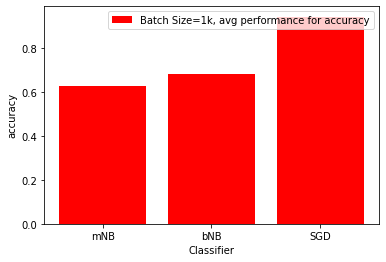

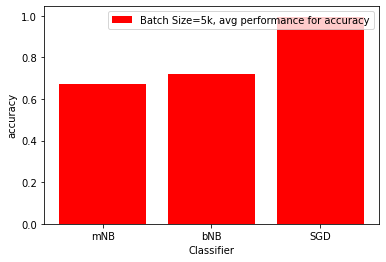

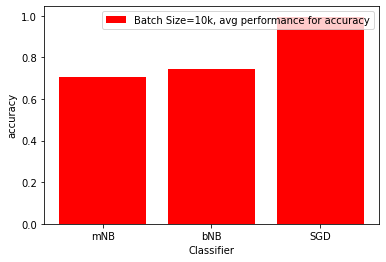

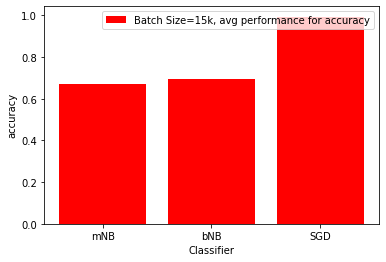

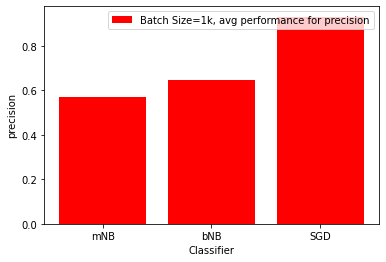

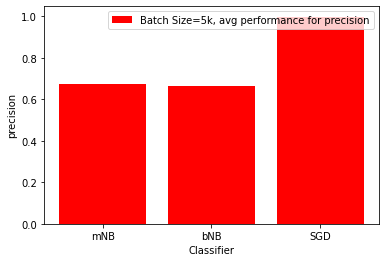

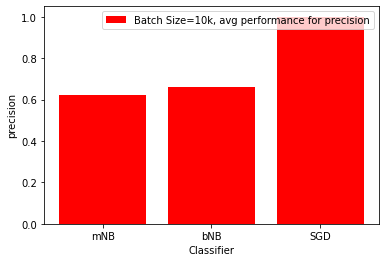

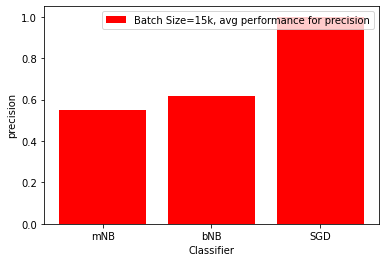

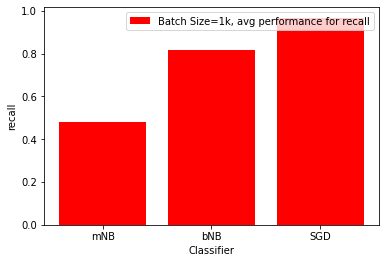

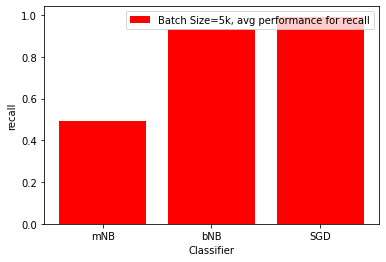

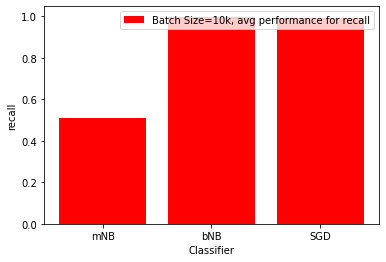

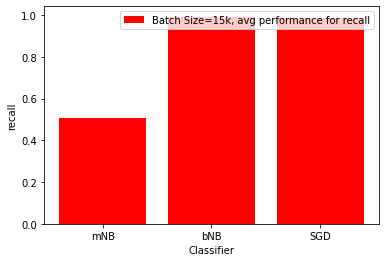

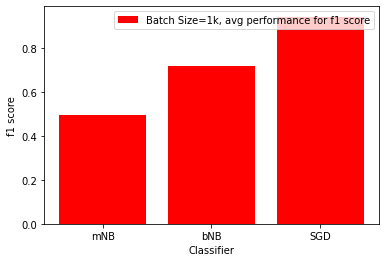

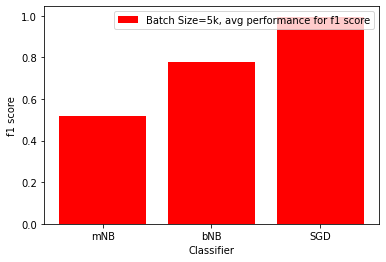

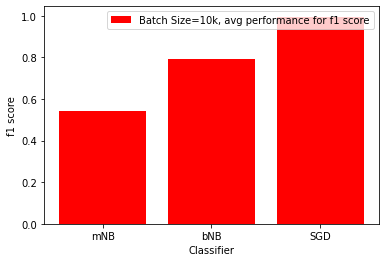

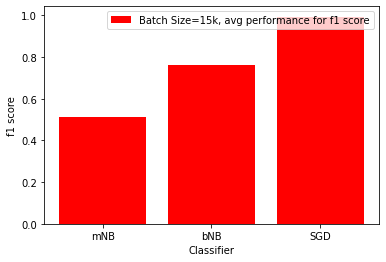

In [ ]:
classifiers_metric('accuracy')
classifiers_metric('precision')
classifiers_metric('recall')
classifiers_metric('f1 score')

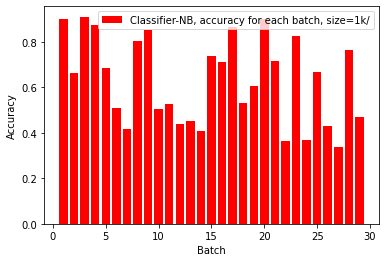

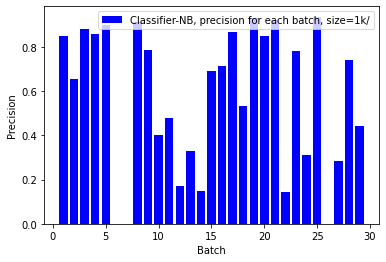

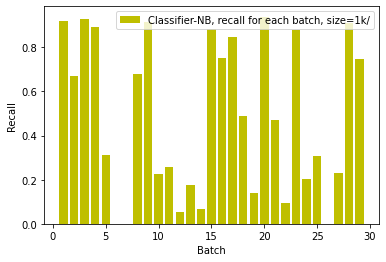

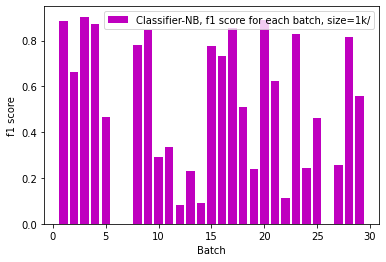

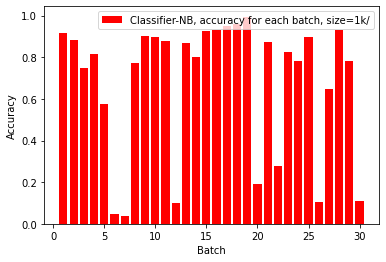

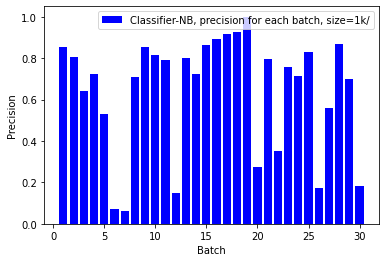

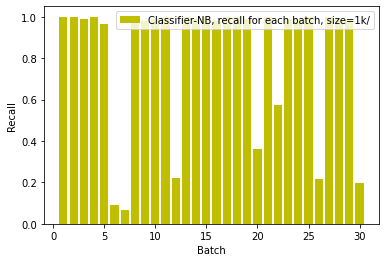

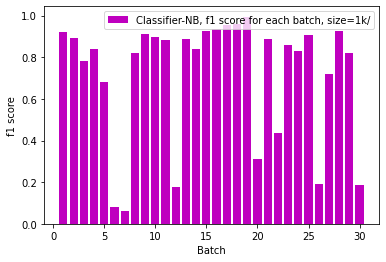

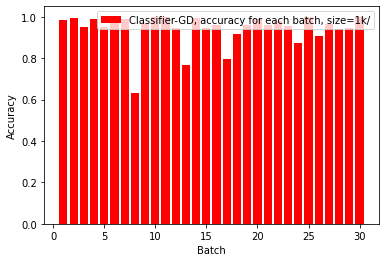

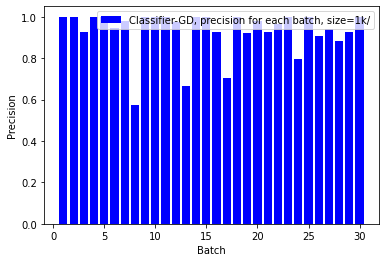

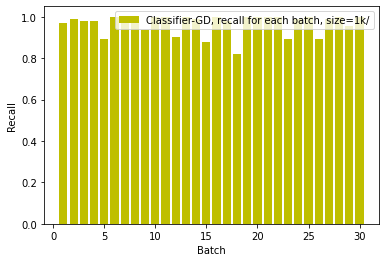

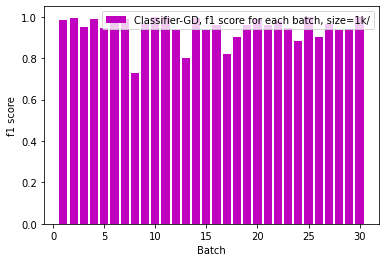

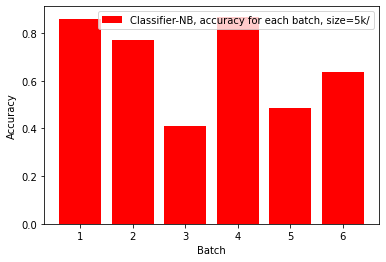

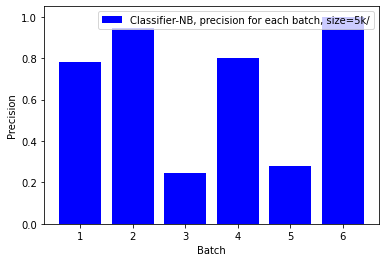

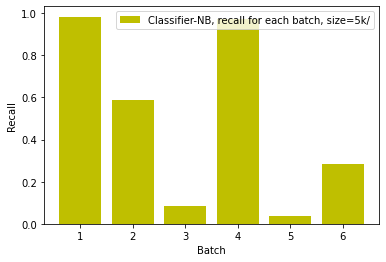

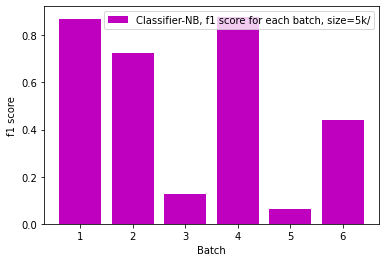

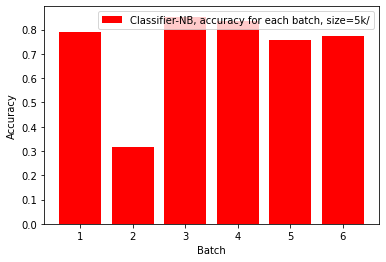

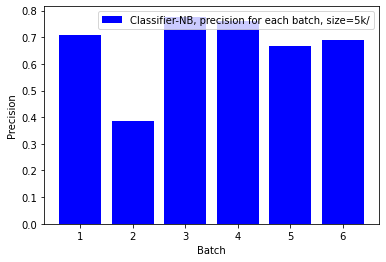

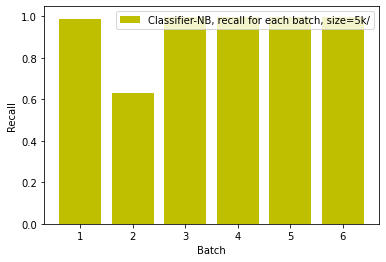

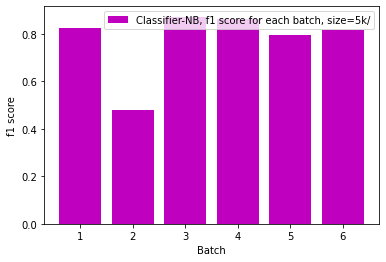

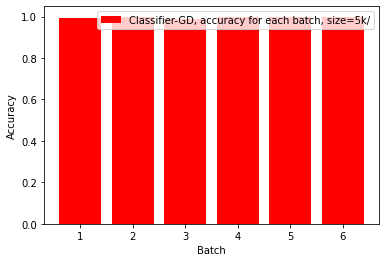

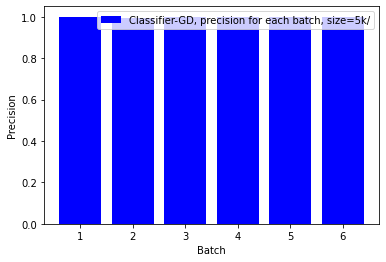

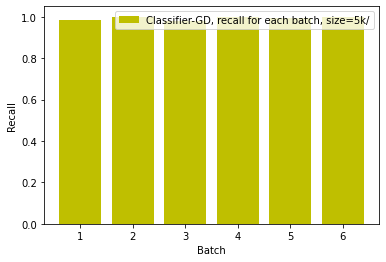

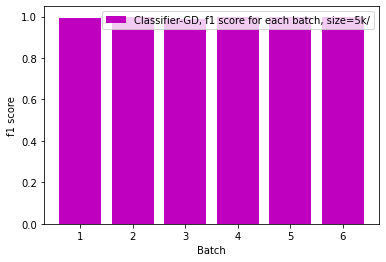

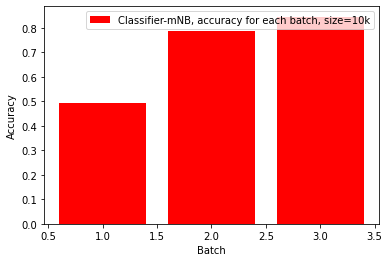

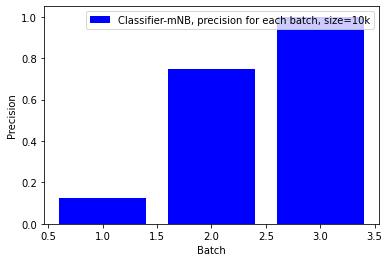

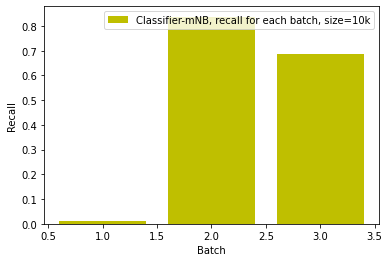

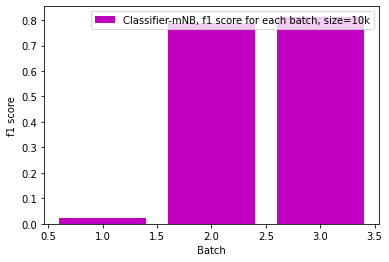

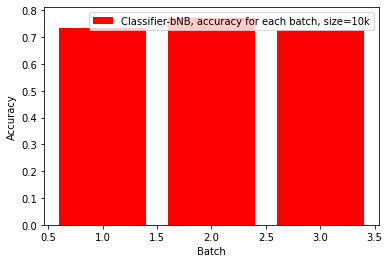

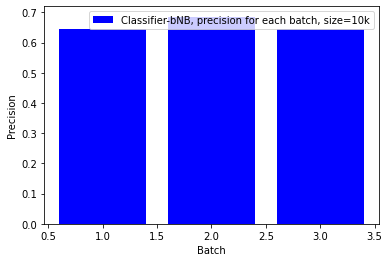

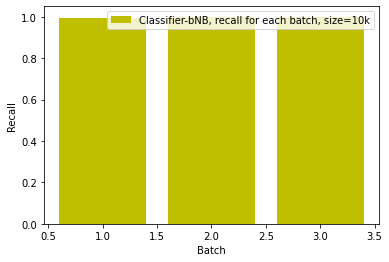

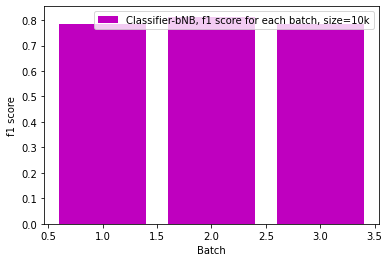

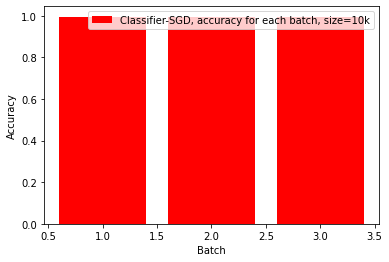

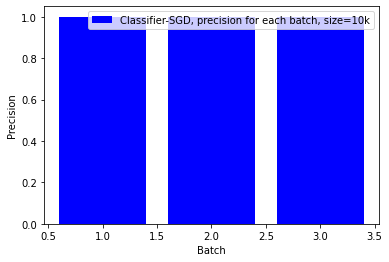

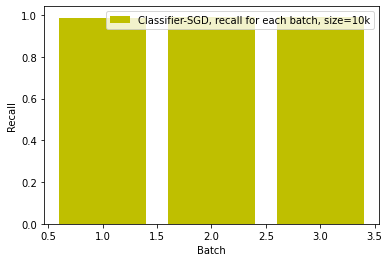

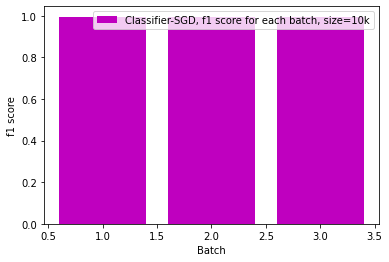

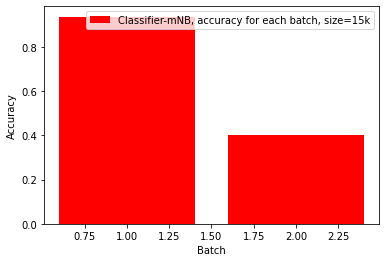

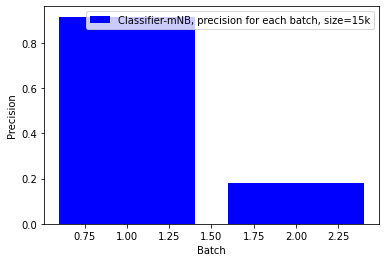

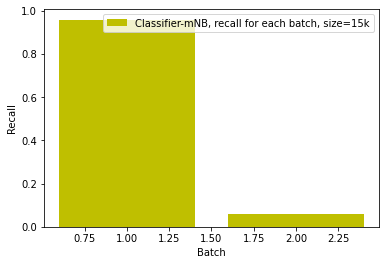

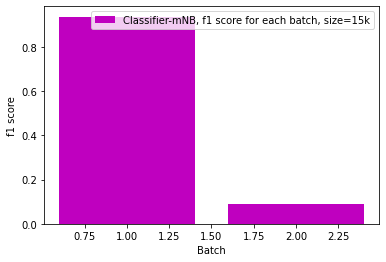

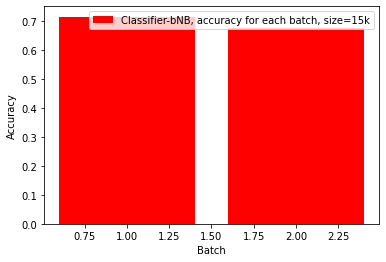

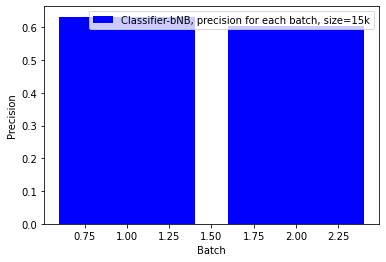

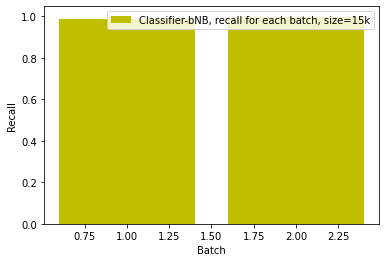

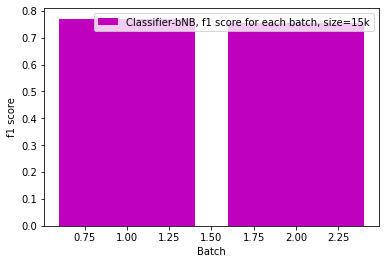

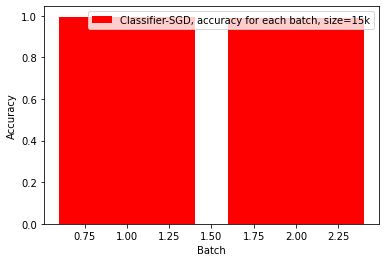

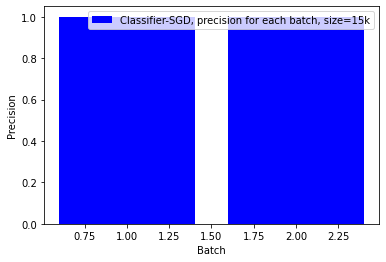

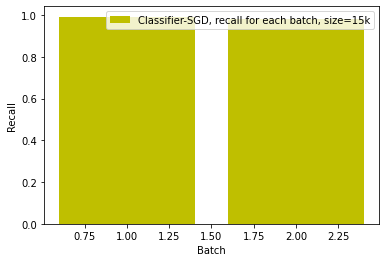

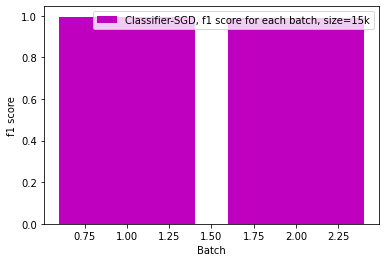

In [ ]:
for j in ['1k/', '5k/', '10k/', '15k/']:
  classifier_perf_metric(j+'mNB', j[0:3])
  classifier_perf_metric(j+'bNB', j[0:3])
  classifier_perf_metric(j+'SGD', j[0:3])

In [ ]:
def avg_scores(dataset_name):
  url = f'https://raw.githubusercontent.com/Abhishek4848/Datasets/master/Spark%20streaming%20Metrics/{dataset_name}.csv'
  df = pd.read_csv(url,header=None)
  df.columns = ['Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
  return([df['Accuracy'].mean(),df['Precision'].mean(),df['Recall'].mean(),df['F1 Score'].mean()])

In [ ]:
bnb_1k = avg_scores("bnb/bNB_1k")
bnb_5k = avg_scores("bnb/bNB_5k")
bnb_10k = avg_scores("bnb/bNB_10k")
bnb_15k = avg_scores("bnb/bNB_15k")
mnb_1k = avg_scores("mnb/mNB_1k")
mnb_5k = avg_scores("mnb/mNB_5k")
mnb_10k = avg_scores("mnb/mNB_10k")
mnb_15k = avg_scores("mnb/mNB_15k")
sgd_1k = avg_scores("sgd/SGD_1K")
sgd_5k = avg_scores("sgd/SGD_5K")
sgd_10k = avg_scores("sgd/SGD_10k")
sgd_15k = avg_scores("sgd/SGD_15K")

## BernoulliNB Classifier

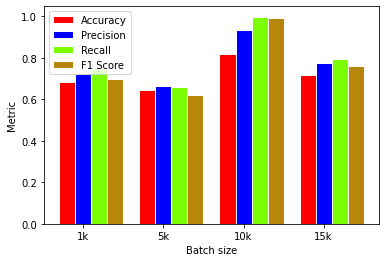

In [ ]:
x = np.arange(4)
width = 0.2
plt.bar(x-0.2,bnb_1k, width, color='red',edgecolor='white')
plt.bar(x, bnb_5k, width, color='blue',edgecolor='white')
plt.bar(x+0.2, bnb_10k, width, color='lawngreen',edgecolor='white')
plt.bar(x+0.4, bnb_15k, width, color='darkgoldenrod',edgecolor='white')
plt.xticks(x, ['1k', '5k', '10k', '15k'])
plt.xlabel("Batch size")
plt.ylabel("Metric")
plt.legend(["Accuracy", "Precision", "Recall", "F1 Score"])
plt.show()

## MultinomialNB Classifier

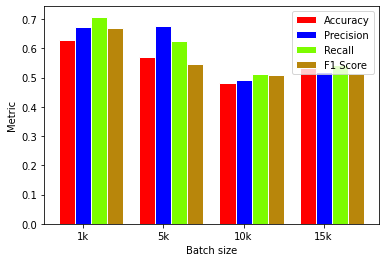

In [ ]:
x = np.arange(4)
width = 0.2
plt.bar(x-0.2,mnb_1k, width, color='red',edgecolor='white')
plt.bar(x, mnb_5k, width, color='blue',edgecolor='white')
plt.bar(x+0.2, mnb_10k, width, color='lawngreen',edgecolor='white')
plt.bar(x+0.4, mnb_15k, width, color='darkgoldenrod',edgecolor='white')
plt.xticks(x, ['1k', '5k', '10k', '15k'])
plt.xlabel("Batch size")
plt.ylabel("Metric")
plt.legend(["Accuracy", "Precision", "Recall", "F1 Score"])
plt.show()

## SGD Classifier

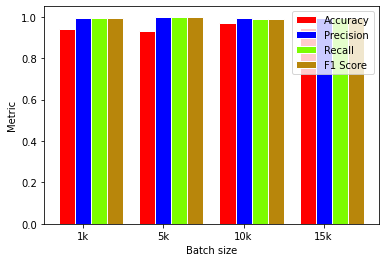

In [ ]:
x = np.arange(4)
width = 0.2
plt.bar(x-0.2,sgd_1k, width, color='red',edgecolor='white')
plt.bar(x, sgd_5k, width, color='blue',edgecolor='white')
plt.bar(x+0.2, sgd_10k, width, color='lawngreen',edgecolor='white')
plt.bar(x+0.4, sgd_15k, width, color='darkgoldenrod',edgecolor='white')
plt.xticks(x, ['1k', '5k', '10k', '15k'])
plt.xlabel("Batch size")
plt.ylabel("Metric")
plt.legend(["Accuracy", "Precision", "Recall", "F1 Score"])
plt.show()